<a href="https://colab.research.google.com/github/Rajfekar/PythonML/blob/main/RAj_Copy_of_Tr_OCR_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from transformers import VisionEncoderDecoderModel,TrOCRProcessor

In [ ]:
# !pip install --upgrade safetensors

In [ ]:
model = VisionEncoderDecoderModel.from_pretrained("/content/model")
# model.to(device)

In [ ]:
from PIL import Image
image = Image.open("/content/formula_img.jpg").convert("RGB")

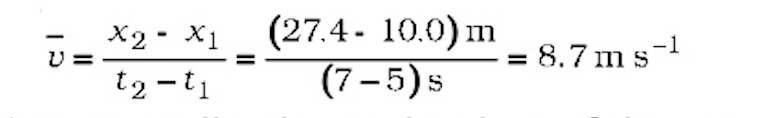

In [ ]:
image

In [ ]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
from transformers import PreTrainedTokenizerFast
from tokenizers import Tokenizer as TokenizerslibTokenizer
tok = TokenizerslibTokenizer.from_file("/content/tokenizer-wordlevel.json")

tokenizer = PreTrainedTokenizerFast(tokenizer_object=tok, unk_token = "[unk]", cls_token = "[pad]", sep_token = "[sep]",
                                                    pad_token = "[pad]", mask_token = "[mask]")

In [ ]:
tokenizer

PreTrainedTokenizerFast(name_or_path='', vocab_size=581, model_max_length=1000000000000000019884624838656, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[unk]', 'sep_token': '[sep]', 'pad_token': '[pad]', 'cls_token': '[pad]', 'mask_token': '[mask]'}, clean_up_tokenization_spaces=False, added_tokens_decoder={
	0: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	1: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	2: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	3: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	4: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	581: AddedToken("[unk]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	582: AddedToken(

In [ ]:
# processor = TrOCRProcessor.from_pretrained("microsoft/trocr-small-printed")
# inputs = processor(images=image, return_tensors="pt").to(device)
# outputs = model.generate(inputs.pixel_values)
# text = processor.batch_decode(outputs, skip_special_tokens=True)[0]
# print(text)

In [ ]:
from transformers import ViTImageProcessor,TrOCRProcessor
processor = ViTImageProcessor.from_pretrained("microsoft/trocr-small-stage1")

processor = TrOCRProcessor(feature_extractor = processor, tokenizer = tokenizer)

preprocessor_config.json:   0%|          | 0.00/276 [00:00<?, ?B/s]

In [ ]:
inputs = processor(images=image, return_tensors="pt").to(device)
# inputs

In [ ]:
outputs = model.generate(inputs.pixel_values)
# outputs

In [ ]:
predicted_latex = processor.batch_decode(outputs, skip_special_tokens=True)[0]
print(predicted_latex)

begin array { } \ { c } { frac \ _ 2 { } cdot _ 1 { } { _ 1 } \\ \ { _ \ { } t { } } { ^ \ { prime } } _ 1 0 \ ) \ { mathrm I } \\ end array
